In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('/Users/jaegyuhan/PythonEx_1/mnist_data', one_hot=True)

Extracting /Users/jaegyuhan/PythonEx_1/mnist_data/train-images-idx3-ubyte.gz
Extracting /Users/jaegyuhan/PythonEx_1/mnist_data/train-labels-idx1-ubyte.gz
Extracting /Users/jaegyuhan/PythonEx_1/mnist_data/t10k-images-idx3-ubyte.gz
Extracting /Users/jaegyuhan/PythonEx_1/mnist_data/t10k-labels-idx1-ubyte.gz


In [17]:
X_test = mnist.test.images
Y_test = mnist.test.labels

In [29]:
test_xdata = X_test[0:1,]
test_ydata = Y_test[0]

In [66]:
ll = test_xdata.reshape(784,)

In [72]:
im = Image.open("../넘파이 연습/temp.png")

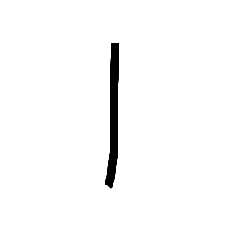

In [73]:
im

In [74]:
img2 = im.resize((28,28))

In [75]:
b = img2.tobytes("raw","A")

In [76]:
ll = [i/255 for i in b ]

In [77]:
len(ll)

784

In [79]:
ll = np.array(ll)

In [80]:
ll.shape

(784,)

In [81]:
ll = ll.reshape(1,784)

In [82]:
ll.shape

(1, 784)

In [30]:
test_xdata

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [34]:
print(len(test_xdata[0]))
print(test_ydata)
print(test_xdata.shape)

784
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
(1, 784)


In [5]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [6]:
W1 = tf.Variable(tf.random_normal(shape=[784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

In [7]:
W2 = tf.Variable(tf.random_normal(shape=[256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [8]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [83]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    batch_size = 100
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for epoch in range(15):
        total_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y: batch_ys})
            total_cost += cost_val
        
        print("Epoch:","%04d" % (epoch + 1), "Avg. cost =", "{:.3f}".format(total_cost / total_batch))
    
    print('최적화 완료!')
    
    is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print("정확도:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
    predict = sess.run([model], feed_dict={X:ll})
    print(predict)
    predict = np.array(predict)
    print("shape:", predict.shape)
    print("result : ",np.argmax(predict[0], axis=1))

Epoch: 0001 Avg. cost = 0.406
Epoch: 0002 Avg. cost = 0.148
Epoch: 0003 Avg. cost = 0.095
Epoch: 0004 Avg. cost = 0.070
Epoch: 0005 Avg. cost = 0.054
Epoch: 0006 Avg. cost = 0.040
Epoch: 0007 Avg. cost = 0.032
Epoch: 0008 Avg. cost = 0.026
Epoch: 0009 Avg. cost = 0.022
Epoch: 0010 Avg. cost = 0.017
Epoch: 0011 Avg. cost = 0.014
Epoch: 0012 Avg. cost = 0.014
Epoch: 0013 Avg. cost = 0.013
Epoch: 0014 Avg. cost = 0.014
Epoch: 0015 Avg. cost = 0.010
최적화 완료!
정확도: 0.9753
[array([[-8.23239708,  3.20705104, -0.05356766, -5.39516211, -2.70905828,
        -5.75808811, -6.0756855 ,  0.68323439, -0.88107586, -3.7519877 ]], dtype=float32)]
shape: (1, 1, 10)
result :  [1]


In [16]:
int(mnist.train.num_examples)

55000

In [41]:
arr = [-12.51021767,  -5.7246809 ,  -0.31184155,  -1.74826264,
        -17.8037262 ,  -9.16267967, -26.60844612,  15.07253742,
        -11.10308647,  -5.45234251]

In [42]:
arr = np.array(arr)

In [43]:
arr

array([-12.51021767,  -5.7246809 ,  -0.31184155,  -1.74826264,
       -17.8037262 ,  -9.16267967, -26.60844612,  15.07253742,
       -11.10308647,  -5.45234251])

In [50]:
arr = arr.reshape([1,10])

In [52]:
print(np.argmax(arr, axis=1))

[7]


In [56]:
arr.shape

(1, 10)